# Task 2: Community structure on graphs

In [1]:
import community
import networkx as nx
import plotly as plt
import pandas as pd
import matplotlib.pyplot as plt

Given script (Louvain algorithm)

In [2]:
# load the edge list and create a directed Graph
fh = open("canvas/hamster.edgelist", 'rb')
G = nx.read_edgelist(fh)
fh.close()

In [3]:
# This method implements Louvain method using a greedy algorithm
# This is the partition of highest modularity, 
# i.e. the highest partition of the dendrogram generated by the Louvain algorithm
# more details: http://perso.crans.org/aynaud/communities/api.html#community.best_partition
partition = community.community_louvain.best_partition(G)

In [4]:
# partition is the returned results of best_partition
# it is a dict in Python
print(partition)

{'1': 0, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 2, '8': 3, '9': 3, '10': 3, '11': 3, '12': 3, '13': 3, '14': 3, '15': 3, '16': 3, '17': 3, '18': 3, '19': 3, '20': 4, '21': 0, '22': 0, '23': 0, '24': 0, '25': 5, '26': 3, '27': 5, '28': 6, '29': 5, '30': 5, '31': 5, '32': 5, '33': 6, '34': 6, '35': 6, '36': 6, '37': 5, '38': 5, '39': 3, '40': 3, '41': 3, '42': 3, '43': 3, '44': 3, '45': 3, '46': 5, '47': 0, '48': 5, '49': 5, '50': 5, '51': 5, '52': 5, '53': 5, '54': 5, '55': 5, '56': 5, '57': 5, '58': 5, '59': 5, '60': 5, '61': 5, '62': 5, '63': 5, '64': 3, '65': 5, '66': 5, '67': 0, '68': 0, '69': 0, '70': 2, '71': 7, '72': 7, '73': 3, '74': 3, '75': 2, '76': 2, '77': 0, '78': 7, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 3, '86': 5, '87': 5, '88': 5, '89': 5, '90': 5, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 8, '108': 0, '109': 0, '110': 0, '111': 

Visualization from: https://stackoverflow.com/questions/40941264/how-to-draw-a-small-graph-with-community-structure-in-networkx

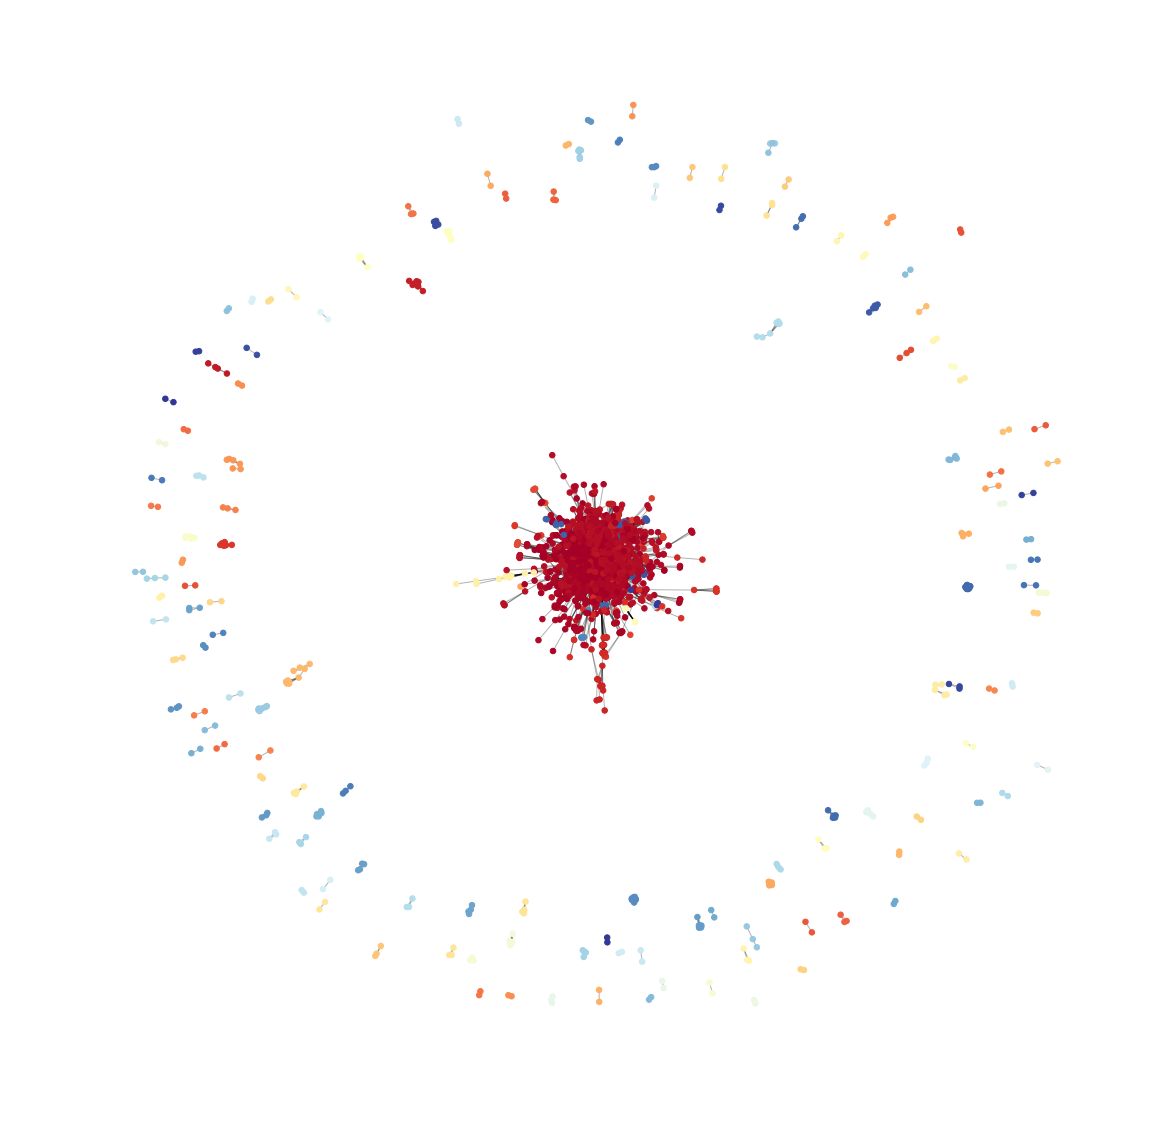

In [5]:
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [6]:
# Calculate number of communities.
len(set(partition.values()))

183

In [8]:
# Calculate the amount of members that each community has.
lst = []
for i in list(set(partition.values())):
    lst.append(sum(1 for x in partition.values() if x==i))
print(lst)

[511, 38, 160, 329, 83, 252, 166, 194, 46, 35, 4, 12, 8, 17, 19, 2, 23, 11, 4, 17, 7, 3, 5, 2, 2, 5, 6, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 6, 2, 3, 2, 2, 4, 2, 4, 2, 2, 2, 10, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 4, 3, 2, 4, 2, 5, 2, 12, 2, 3, 2, 2, 2, 2, 7, 3, 4, 5, 2, 2, 5, 2, 3, 3, 5, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 7, 2, 3, 3, 3, 4, 5, 2, 6, 3, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 2, 4, 3, 4, 5, 3, 2, 3, 2, 8, 3, 5, 2, 2, 3, 2, 2, 2, 3, 5, 13, 4, 7, 3, 5, 6, 4, 2, 5, 2, 3, 2, 2, 4, 2, 2]


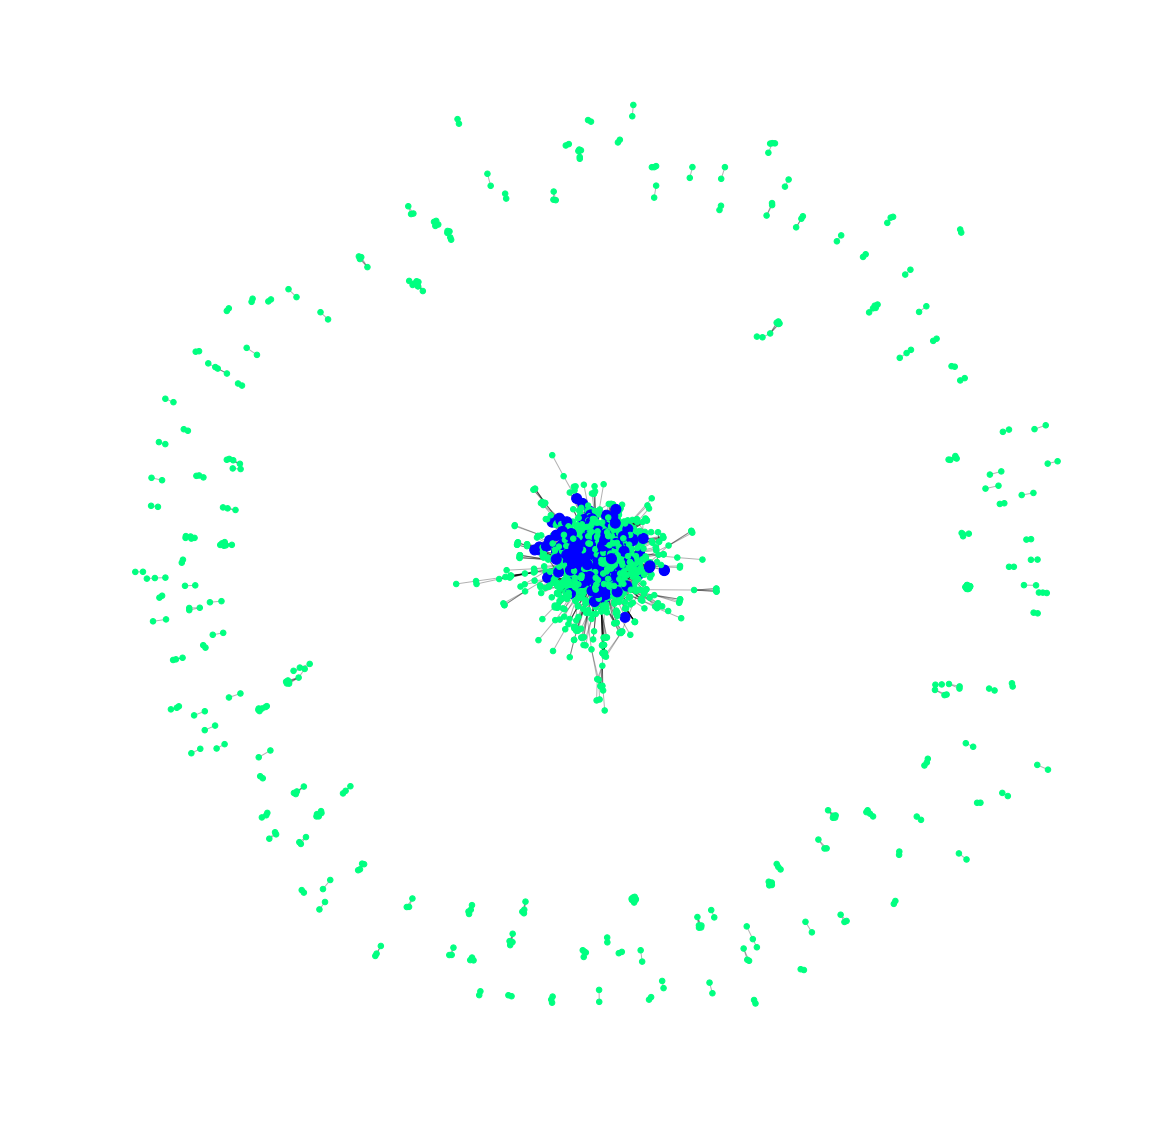

In [10]:
# Highlight one community (in this case, community 0) to make it easier to see
part = partition.copy()
node_size = []
for node, community in partition.items():
    if community == 0:
        node_size.append(100)
    else:
        part[node] = 1  # I put all the other communities in one communitiy
        node_size.append(30)
        
plt.figure(figsize=(20, 20))
plt.axis('off')
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.winter, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)